In [15]:
require(plotly)
require(ggplot2)
require(gridExtra)

In [2]:
options(repr.matrix.max.rows = 1000)
options(repr.matrix.max.cols = 30)
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=16, repr.plot.height=8)

In [3]:
seriesFolder = 'data'
modelFolder  = 'model'
resultFolder = 'testResult'
imagesFolder = 'images'

Leitura Resultados
===

In [4]:
modelsLake = list.files(path = modelFolder, pattern = NULL, all.files = FALSE, full.names = TRUE, recursive = FALSE)
listResult = list()

In [5]:
modelsName = c("fourier_", "wavelet_", "ssa_", "emdrp_", 
               #"emdmi_", 
               "forcedec_", "forcedectopo_", "forcedectimedomain_")
for(i in 1:length(modelsName)){
    models = modelsLake[grepl(modelsName[i], modelsLake)]
    testData = data.frame()
    for(j in 1:length(models)){
        load(models[j])
        testData = rbind(testData, model$eval)
    }
    listResult[[i]] = testData
}

Métrica: MDDL
===

pdf 
  2

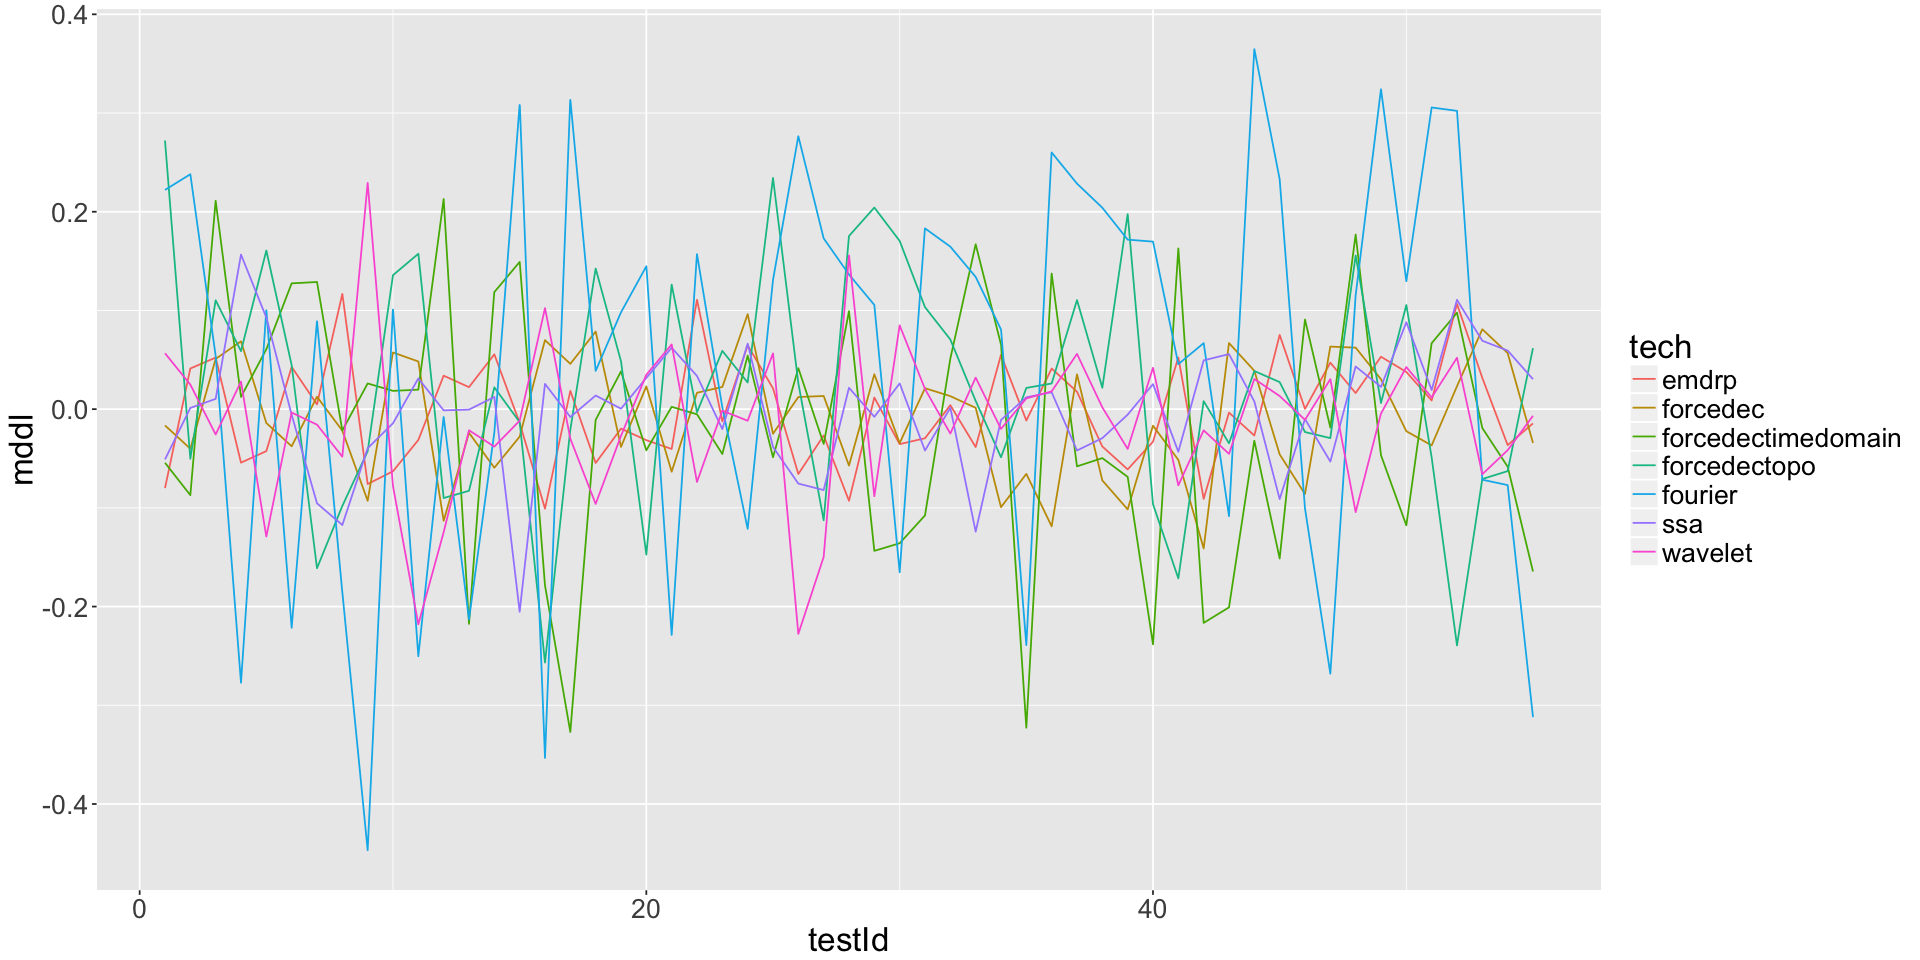

In [6]:

data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mddl.pdf", sep='/'), width=16, height=5)

In [7]:
n = 'mddl'
m = matrix(unlist(lapply(listResult,function(x){cbind(unique(x$tech), mean(unlist(x[n])), sd(unlist(x[n])))})), ncol=3, byrow = T)
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
fourier,0.0454583669013691,0.201474595015183
wavelet,-0.0124010679099549,0.0782435279783969
ssa,-0.000281505932922065,0.0612060413569067
emdrp,-0.00146580965542801,0.0521717066922704
forcedec,-0.00748202548487663,0.0580946836186978
forcedectopo,0.0224310674456497,0.114787676359706
forcedectimedomain,-0.0161200223968769,0.128009917337744


pdf 
  2

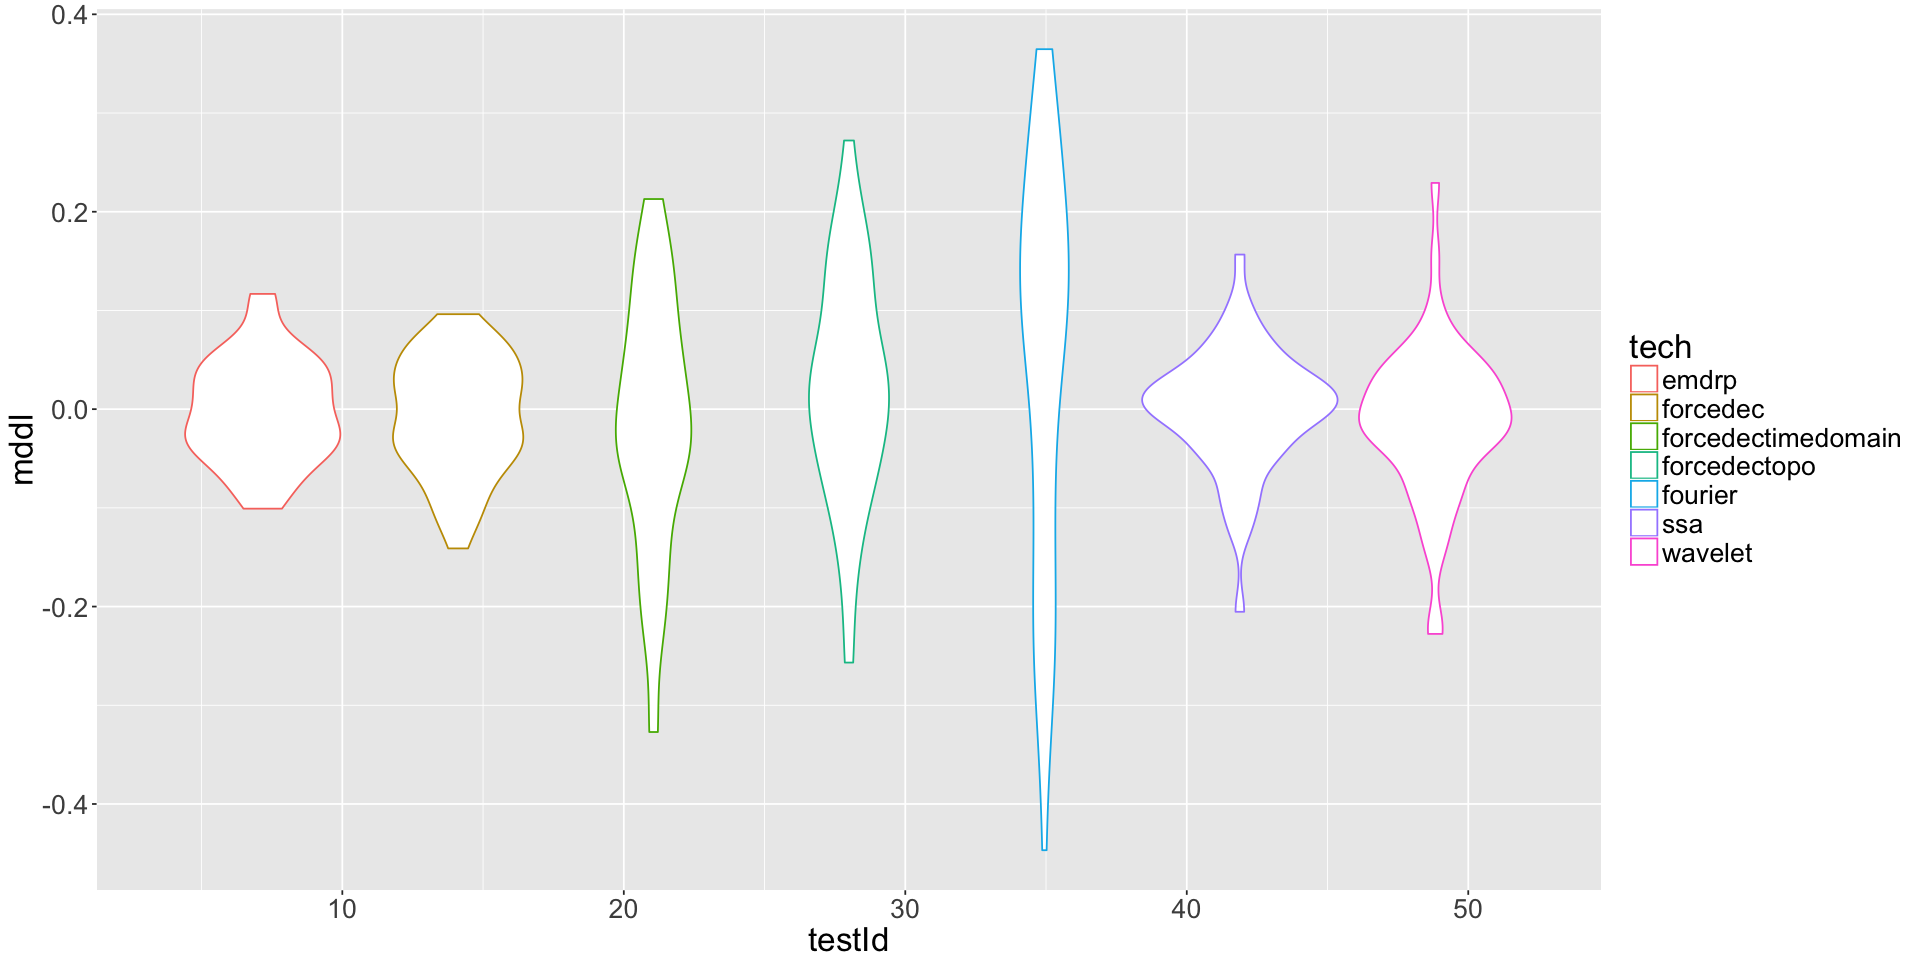

In [8]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_violin(scale = "area") + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mddl_violin.pdf", sep='/'), width=16, height=5)

Métrica: MDA
===

pdf 
  2

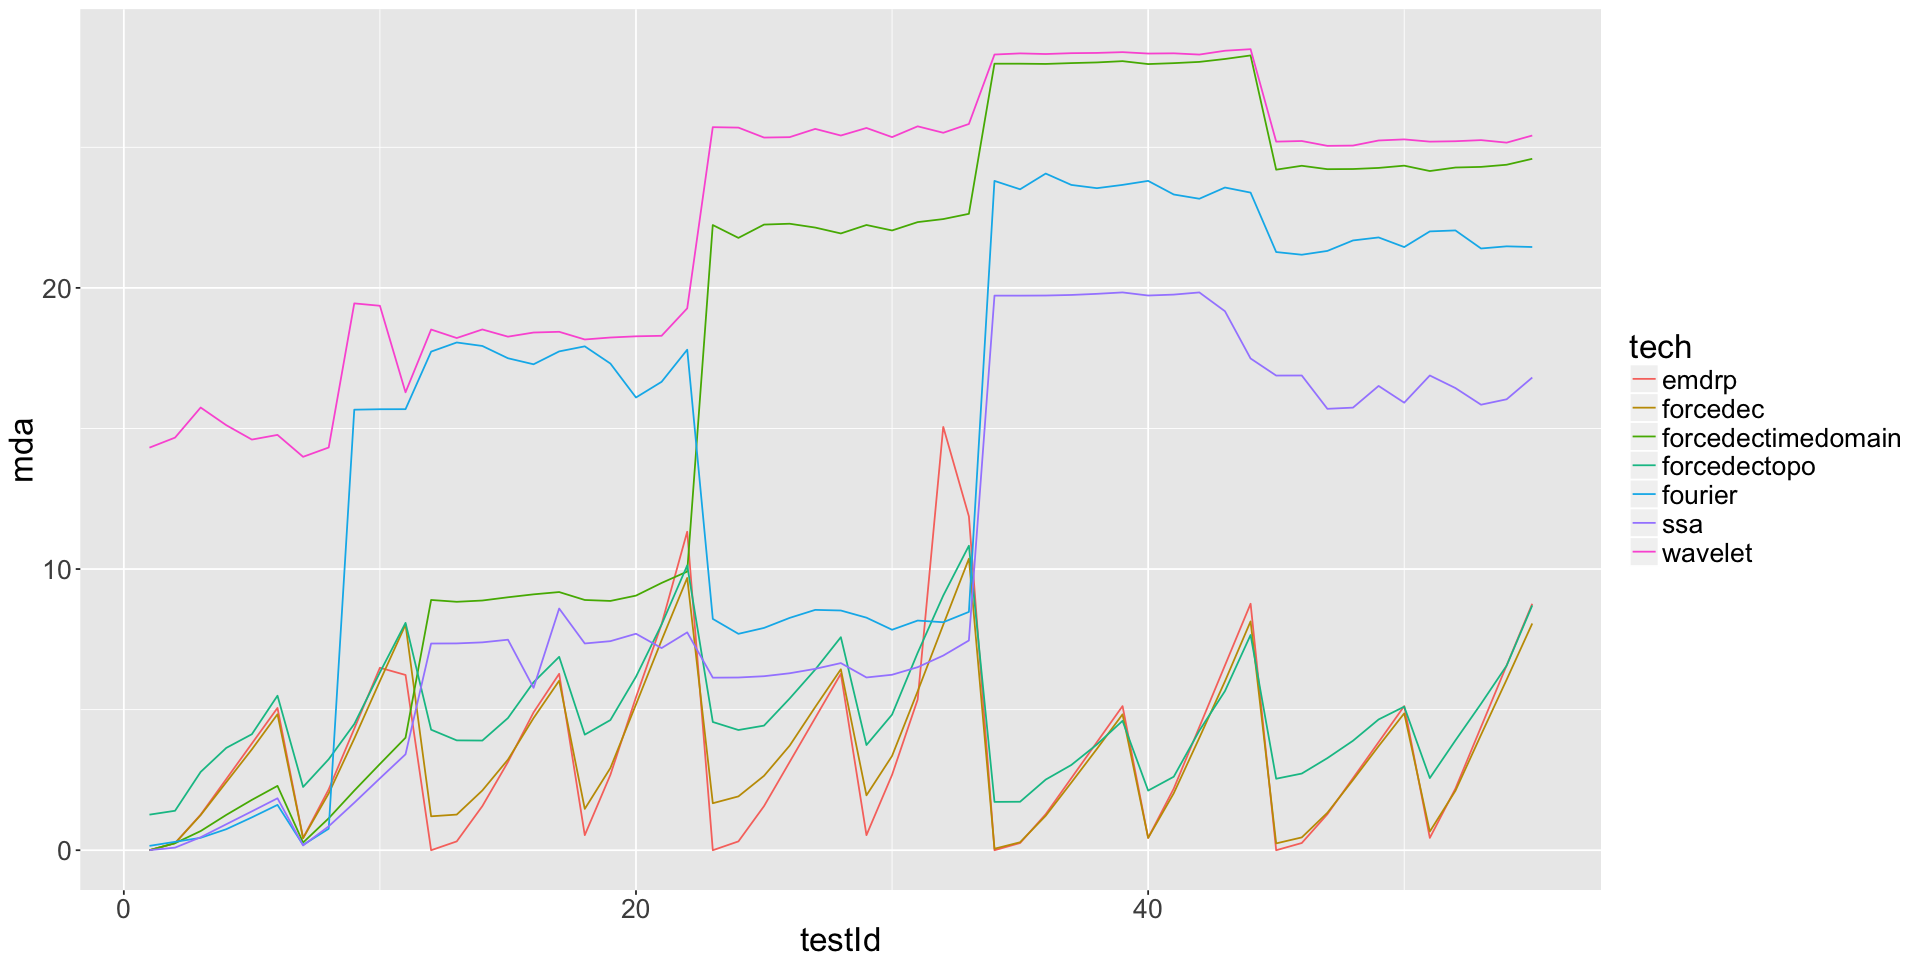

In [9]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line()  + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mda.pdf", sep='/'), width=16, height=5)

In [10]:
n = 'mda'
m = matrix(unlist(lapply(listResult,function(x){cbind(unique(x$tech), mean(unlist(x[n])), sd(unlist(x[n])))})), ncol=3, byrow = T)
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
fourier,15.1101411600918,8.06509457587455
wavelet,22.6516516040374,4.89356066290969
ssa,10.1835278879802,6.82864062956768
emdrp,3.62020438902022,3.34011671346141
forcedec,3.56381812550111,2.64633930566444
forcedectopo,4.77717949864929,2.19245618548093
forcedectimedomain,17.0366403661708,10.1470187952813


pdf 
  2

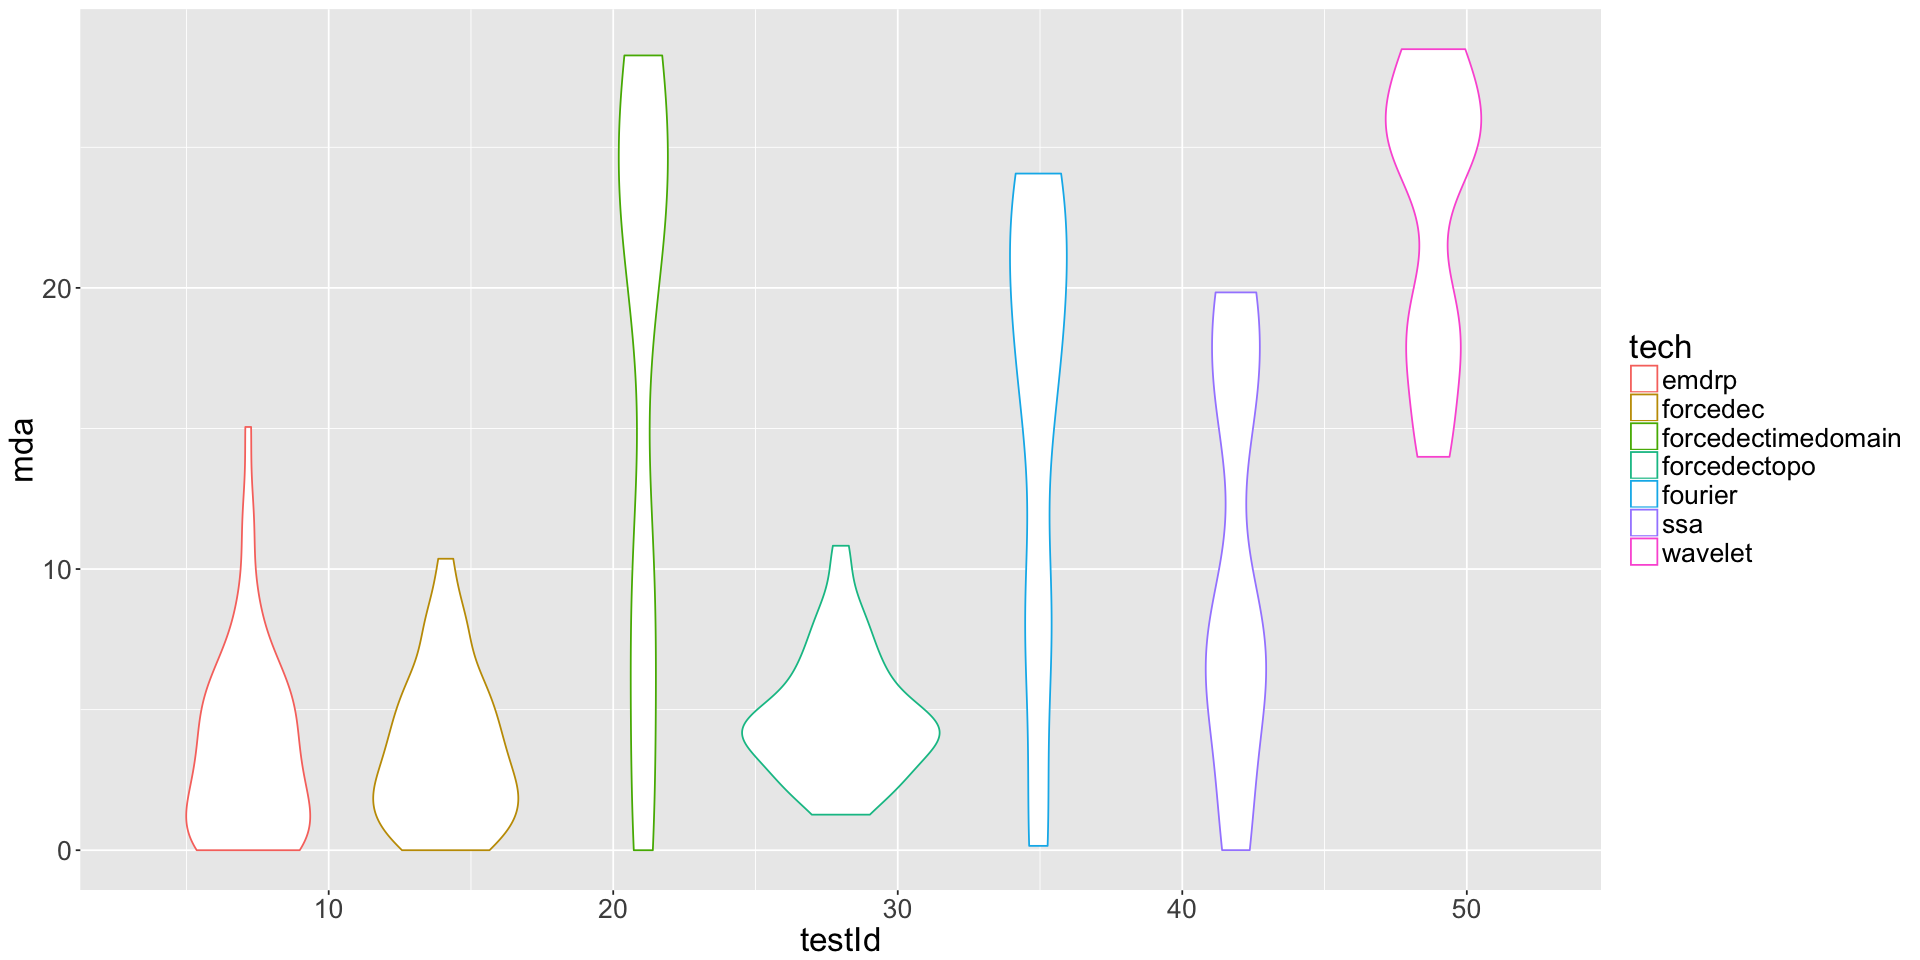

In [11]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_violin(scale = "area") + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mda_violin.pdf", sep='/'), width=16, height=5)

Métrica: Dist
===

pdf 
  2

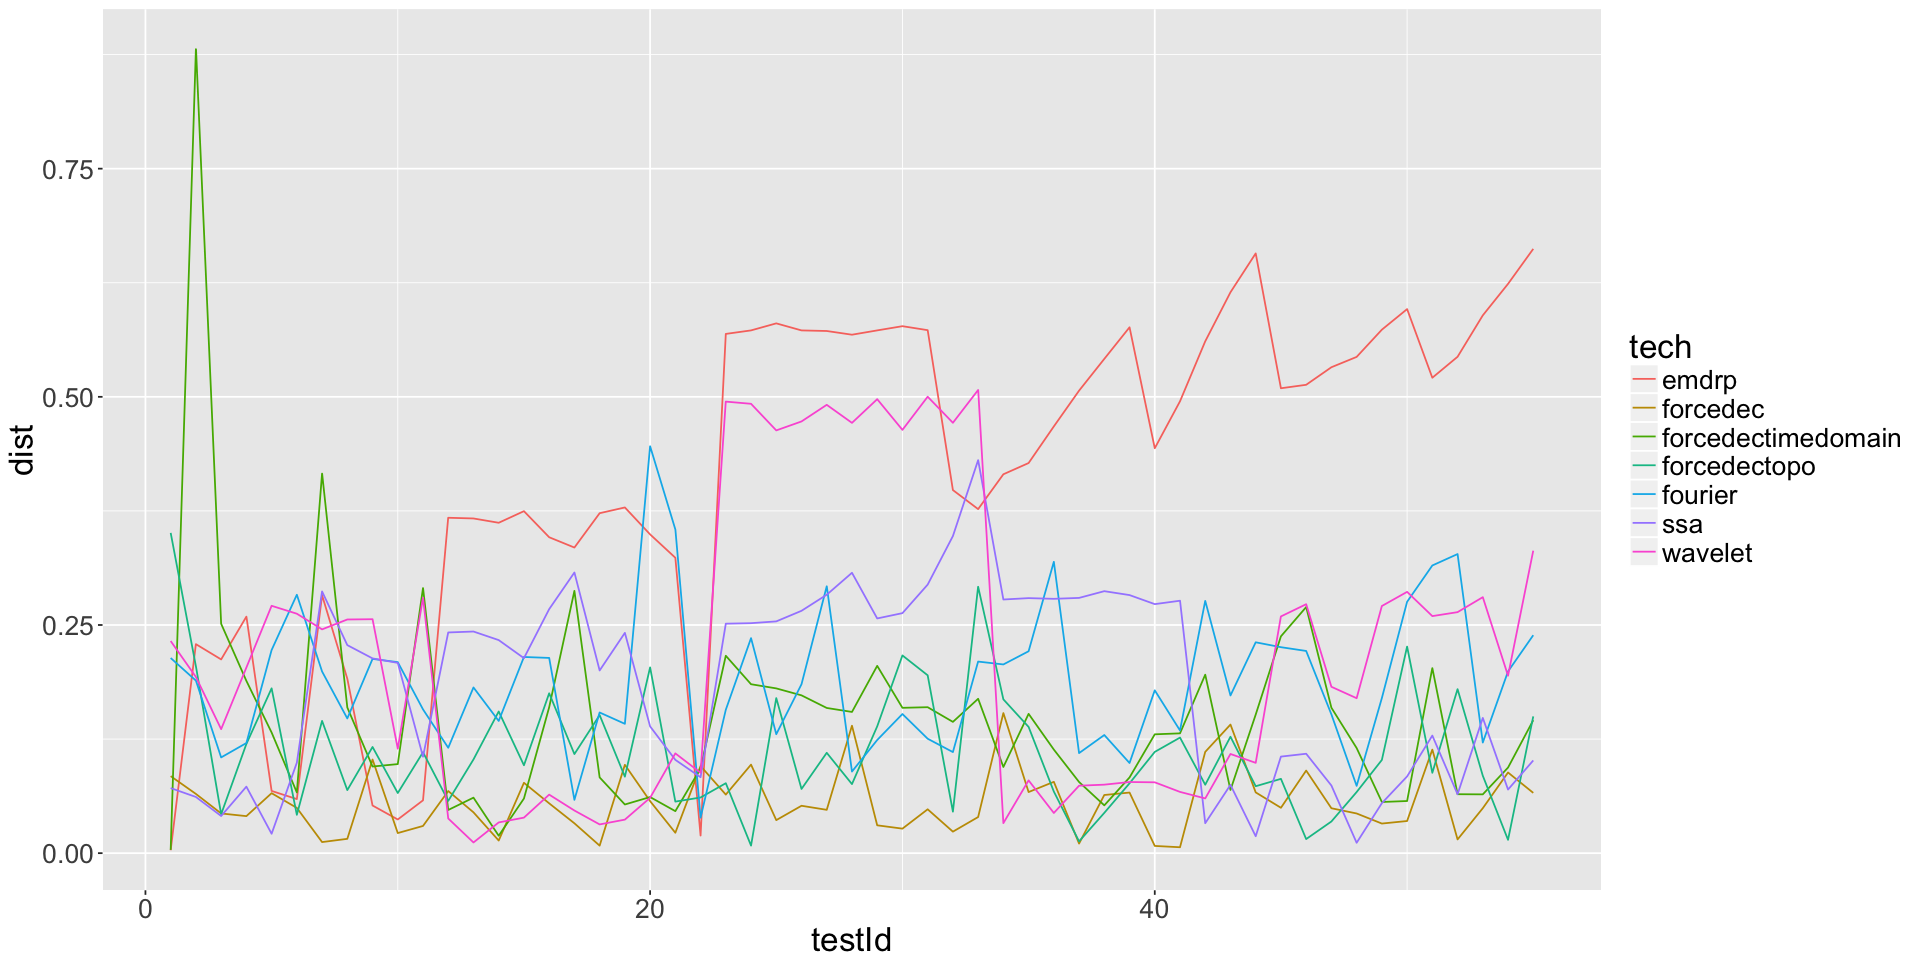

In [12]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','dist')])
p = ggplot(data, aes(x = testId, y = dist, color = tech)) + geom_line() + theme(text = element_text(size=20))
plot(p)    
dev.copy2pdf(file = paste(imagesFolder,"result_dist.pdf", sep='/'), width=16, height=5)

In [13]:
n = 'dist'
m = matrix(unlist(lapply(listResult,function(x){cbind(unique(x$tech), mean(unlist(x[n])), sd(unlist(x[n])))})), ncol=3, byrow = T)
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
fourier,0.187925043028479,0.0782856019265255
wavelet,0.216425238115888,0.161175343970939
ssa,0.185464087892154,0.103621055009817
emdrp,0.416269638827609,0.185368177479167
forcedec,0.0565782314201329,0.0351692255327888
forcedectopo,0.112048886715258,0.0690771784758992
forcedectimedomain,0.148673442972662,0.127254459148879


pdf 
  2

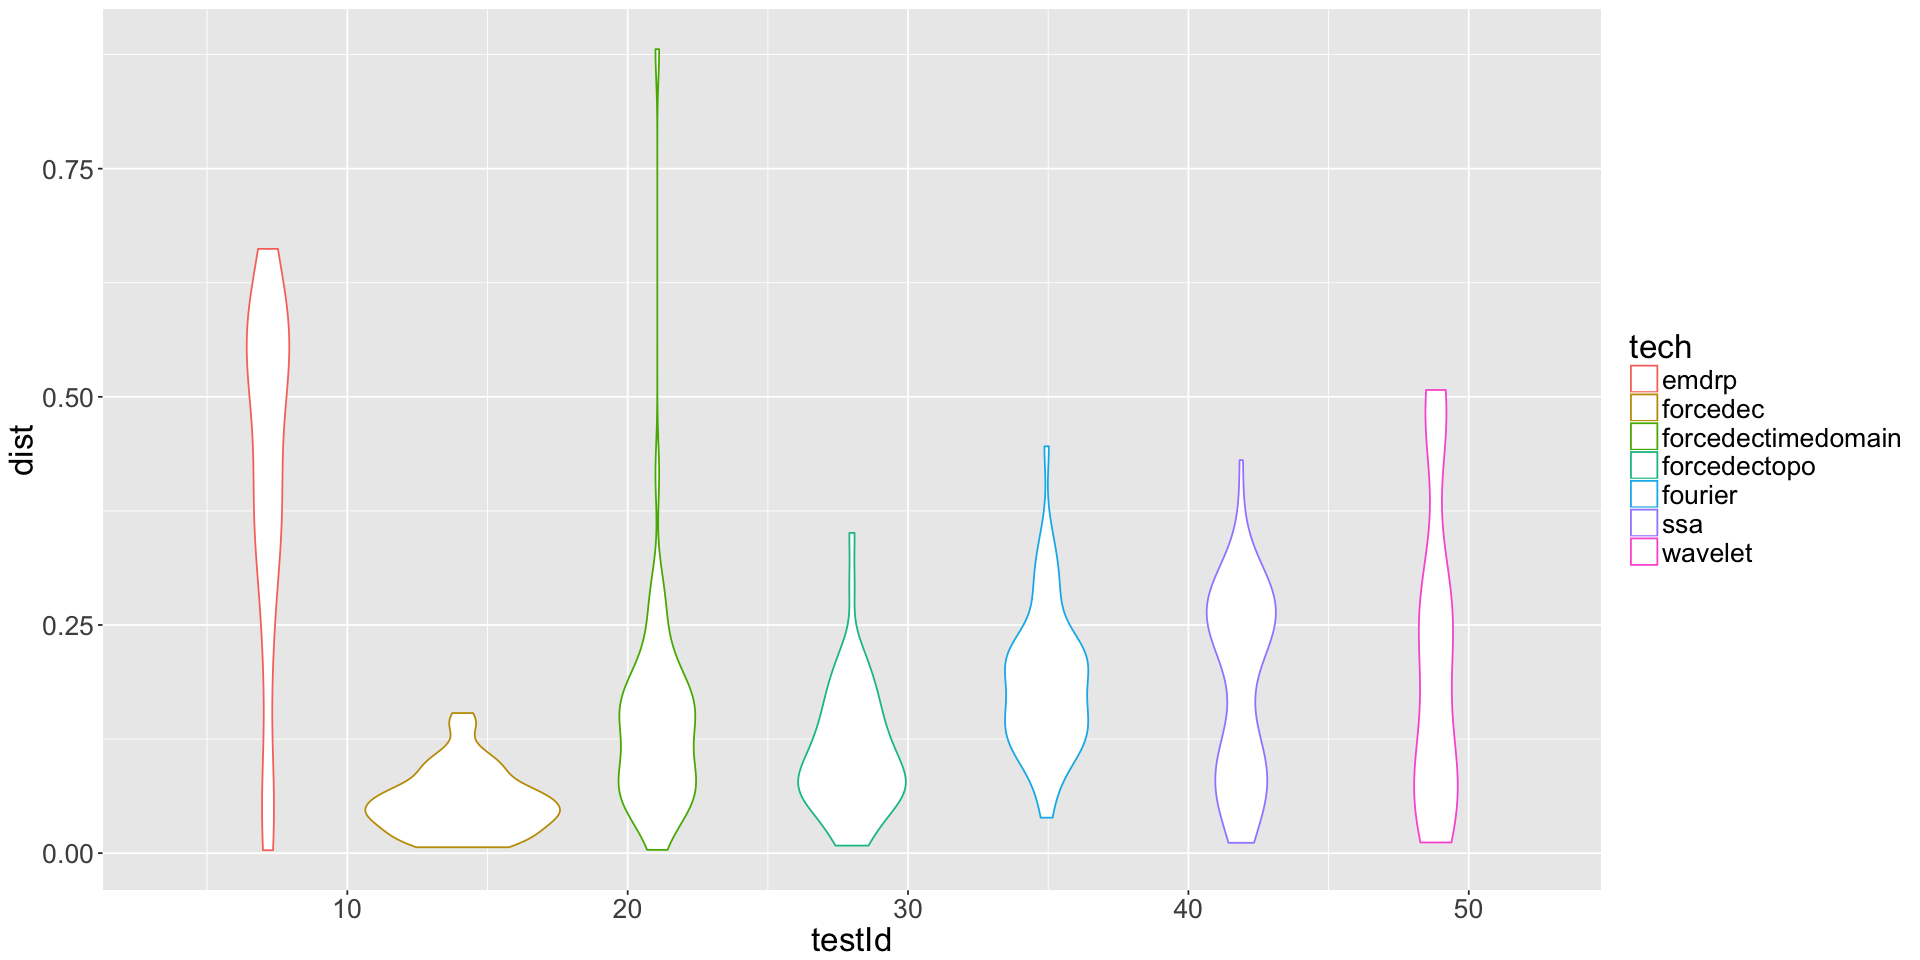

In [14]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','dist')])
ggplot(data, aes(x = testId, y = dist, color = tech)) + geom_violin(scale = "area") + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_dist_violin.pdf", sep='/'), width=16, height=5)